## Построение двухслойной нейронный сети на numpy для классификации цветков ириса.

In [1]:
#conda install -c conda-forge pandas

In [4]:
#conda install -c conda-forge seaborn

In [1]:
#conda install -c conda-forge sklearn-contrib-lightning

In [ ]:
#Импортируем необходимые библиотеки: numpy, pandas, seaborn, matplotlib.pyplot и warnings.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

### Шаг 1. Определение функций, которые понадобятъся для обучения
### преобразование массива в бинарный вид результатов

In [ ]:
#Функция to_one_hot(Y) преобразует вектор меток Y в матрицу в формате "one-hot encoding" (бинарное кодирование).

def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# n_col = np.amax(Y) + 1:
# Определяет количество столбцов в матрице binarized путем нахождения максимального значения в векторе Y и добавления 1.
# Это значение соответствует количеству уникальных меток в Y.
# binarized = np.zeros((len(Y), n_col)):
# Создает матрицу binarized размером (len(Y), n_col), заполненную нулями. Эта матрица будет содержать бинарное представление меток.
# for i in range(len(Y)):
# Проходит по каждому элементу вектора Y.
# binarized[i, Y[i]] = 1.:
# Устанавливает значение 1 в соответствующем столбце Y[i] для текущего элемента Y.
# Таким образом, в каждой строке матрицы binarized будет только одна 1, соответствующая метке элемента.
# return binarized: Возвращает полученную матрицу binarized в формате "one-hot encoding".

# Итоговая матрица binarized будет иметь размерность (len(Y), n_col), где каждая строка будет представлять одну метку вектора Y в бинарном формате.
# Каждая строка будет содержать только одну 1 в столбце, соответствующем метке элемента. Остальные элементы строки будут равны 0.

In [ ]:
# преобразование массива в необходимый вид
# Функция from_one_hot(Y) преобразует матрицу в формате "one-hot encoding" (бинарное кодирование) Y обратно в вектор меток.
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# arr = np.zeros((len(Y), 1)): Создает вектор arr размером (len(Y), 1) и заполняет его нулями. Этот вектор будет содержать преобразованные метки.
# for i in range(len(Y)):: Проходит по каждой строке матрицы Y.
# l = layer2[i]: Присваивает переменной l текущую строку матрицы Y.
# for j in range(len(l)):: Проходит по каждому элементу в строке l.
# if(l[j] == 1):: Проверяет, равен ли текущий элемент l[j] 1 (то есть, является ли он одной из "активных" бинарных меток).
# arr[i] = j+1: Устанавливает значение j+1 в векторе arr[i]. Таким образом, значение j+1 соответствует индексу столбца, в котором находится активная метка в строке l.
# return arr: Возвращает полученный вектор arr с преобразованными метками.

# Итоговый вектор arr будет содержать восстановленные метки, где каждое значение представляет исходную метку,
# соответствующую индексу активной единицы в каждой строке матрицы Y.
# Значения в векторе arr будут целочисленными и могут быть использованы для дальнейшего анализа и интерпретации меток.

In [ ]:
# сигмоида и ее производная
# Функции sigmoid(x) и sigmoid_deriv(x) относятся к функции активации сигмоиды и ее производной соответственно.
#Они используются в нейронных сетях для нелинейного преобразования входных данных.
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# sigmoid(x): Принимает входное значение x и применяет к нему сигмоидную функцию.
# Сигмоидная функция определяется формулой 1 / (1 + exp(-x)), где exp() - это функция экспоненты.
# Сигмоидная функция преобразует входное значение x в диапазоне от 0 до 1, что полезно для моделирования вероятностей или для создания нелинейных связей между нейронами.

# sigmoid_deriv(x): Принимает входное значение x и вычисляет производную сигмоидной функции в точке x.
# Производная сигмоидной функции определяется формулой sigmoid(x) * (1 - sigmoid(x)).
# Производная позволяет определить, насколько быстро или медленно изменяется выход сигмоидной функции в зависимости от входа x.
# Это значение может быть использовано в алгоритмах обратного распространения ошибки для корректировки весов и обновления модели.

# Функции sigmoid(x) и sigmoid_deriv(x) являются важными компонентами нейронных сетей, особенно в слоях с нелинейными активациями,
# такими как слои скрытых нейронов.
# Сигмоидная функция позволяет моделировать нелинейные зависимости между нейронами и управлять выходными значениями нейронов в пределах определенного диапазона.

In [ ]:
# нормализация массива
# Функция normalize(X, axis=-1, order=2) выполняет нормализацию (стандартизацию) входных данных X.
# Нормализация данных помогает привести значения признаков к общему масштабу и облегчает обработку и обучение моделей машинного обучения.

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

# l2 = np.atleast_1d(np.linalg.norm(X, order, axis)): Вычисляет L2-норму (евклидову норму) для данных X вдоль указанной оси axis.
# Функция np.linalg.norm() используется для вычисления нормы.
# Результат нормы будет массивом l2 с размерностью, соответствующей оригинальным данным X.
# Использование np.atleast_1d() гарантирует, что l2 будет иметь размерность не менее 1.

# l2[l2 == 0] = 1: Заменяет все нулевые значения в массиве l2 на 1.
# Это делается для избежания деления на ноль при нормализации, чтобы избежать ошибки.

# return X / np.expand_dims(l2, axis): Выполняет нормализацию данных путем деления оригинальных данных X на массив l2,
# расширенный по указанной оси axis.
# Функция np.expand_dims() используется для добавления размерности к массиву l2,
# чтобы его размерность соответствовала оригинальным данным X и выполнялось правильное деление по соответствующей оси.
# Результатом является нормализованная матрица с теми же размерностями, что и оригинальные данные X.

# функция normalize(X, axis=-1, order=2) выполняет нормализацию входных данных X путем деления на L2-норму вдоль указанной оси.
# Это обеспечивает стандартизацию данных и помогает модели машинного обучения обрабатывать признаки в едином масштабе.

### Шаг 2. Подготовка тренировочных данных
### получения данных из csv файла.

In [4]:
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


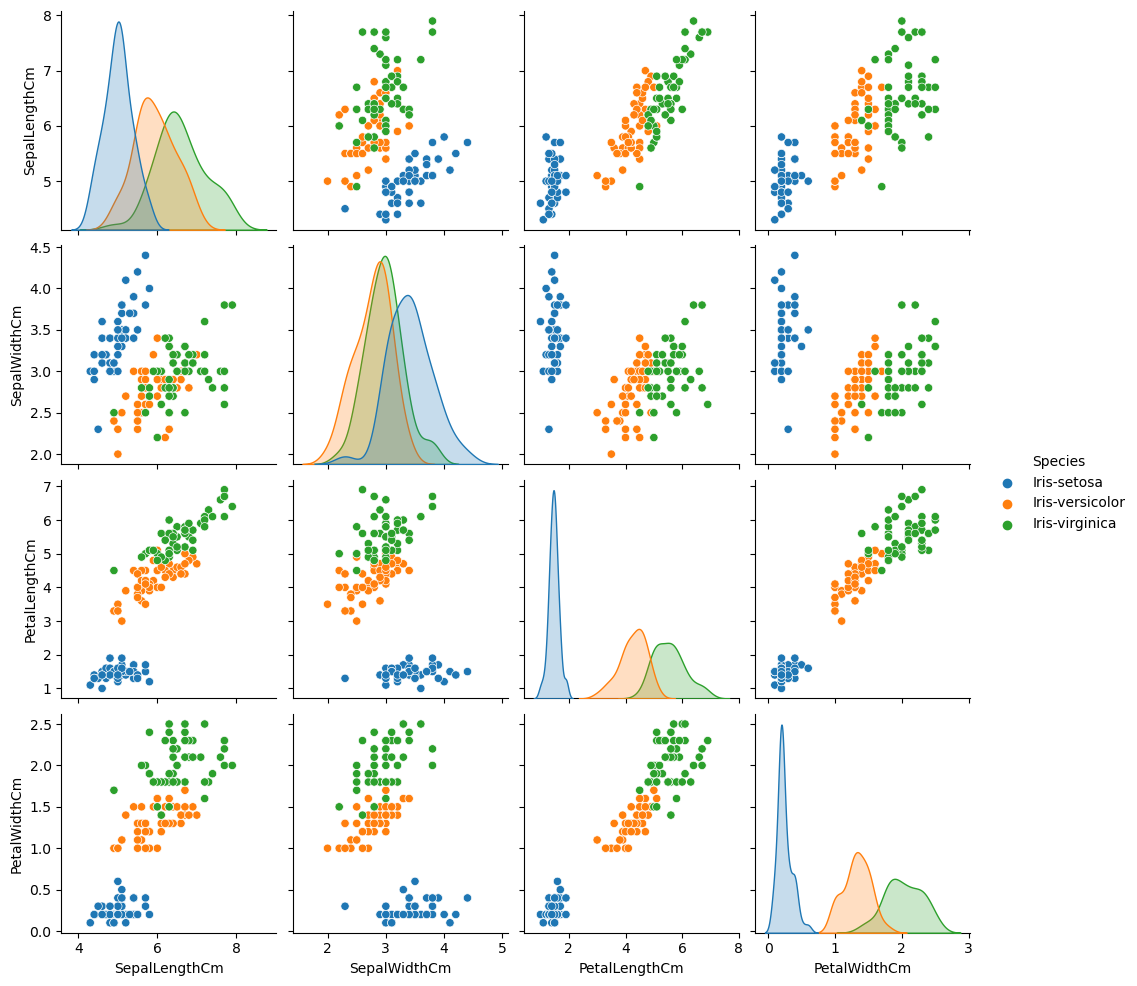

In [5]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [6]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [7]:
# формирование входных данных
# Создается список columns, содержащий названия столбцов, которые будут использованы для формирования входных данных.
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# Создается объект DataFrame x с использованием данных из iris_data и указанных столбцов из списка columns.
# Функция pd.DataFrame() используется для создания DataFrame на основе данных и выбранных столбцов.

# Используется функция normalize(x.values), где x.values возвращает массив значений из DataFrame x.
# Далее, этот массив значений x.values передается в функцию normalize() для выполнения нормализации данных.
# Функция normalize() выполняет нормализацию данных путем деления на L2-норму (евклидову норму) по умолчанию.
# Таким образом, каждый признак будет нормализован, чтобы его значения были в пределах общего масштаба.
#  Результатом является нормализованный массив значений x.

# В результате выполнения этого кода переменная x будет содержать нормализованные входные данные,
# где каждый столбец будет находиться в едином масштабе и готов к использованию в нейронной сети или других моделях машинного обучения.

In [ ]:
# формирование выходных данных(результатов)
# Создается список columns, содержащий название столбца, который будет использован для формирования выходных данных.

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Создается объект DataFrame y с использованием данных из iris_data и указанного столбца из списка columns.
# Функция pd.DataFrame() используется для создания DataFrame на основе данных и выбранного столбца.
# Используется y.values, чтобы получить массив значений из DataFrame y.
# y.flatten() используется для преобразования массива значений y в одномерный массив.
# Это может быть необходимо в случае, когда исходные данные y имеют форму (n, 1), и мы хотим преобразовать их в форму (n,), чтобы соответствовать формату ожидаемого входа для функции to_one_hot().
# Функция to_one_hot(y) принимает одномерный массив меток y и преобразует его в матрицу в формате "one-hot encoding" (бинарное кодирование) с использованием функции to_one_hot() из предыдущего кода.

# В результате выполнения этого кода переменная y будет содержать преобразованные выходные данные в формате "one-hot encoding",
# где каждая метка будет представлена в виде бинарного вектора.
# Это позволяет использовать многоклассовую классификацию в нейронных сетях, где каждый класс будет представлен отдельной активацией в выходном слое нейронной сети.

In [ ]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### Шаг 3. Обученние нейронной сети

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


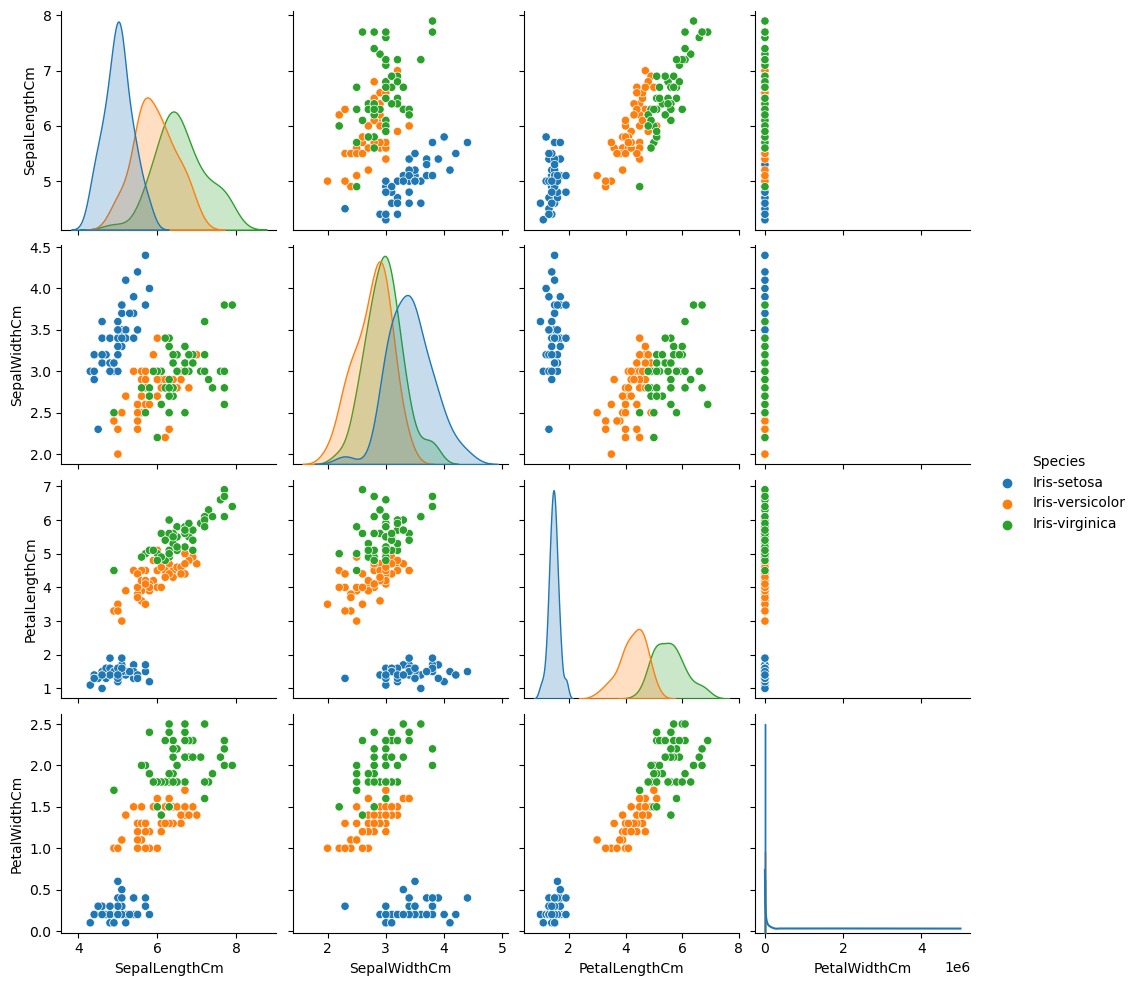

Точность нейронной сети 96.8%


In [2]:
# Данный код выполняет процесс обучения двухслойной нейронной сети для классификации.

# присвоение случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода. Инициализирует веса для входного слоя (w0) случайными значениями в диапазоне от -1 до 1.
                                    # Матрица весов w0 имеет размерность (4, 5), где 4 - количество входных признаков, а 5 - количество нейронов в скрытом слое.
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода. Инициализирует веса для входного слоя (w0) случайными значениями в диапазоне от -1 до 1.
                                    # Матрица весов w0 имеет размерность (4, 5), где 4 - количество входных признаков, а 5 - количество нейронов в скрытом слое.

# скорость обучения  n = 0.001: Задает скорость обучения (learning rate), которая определяет, насколько быстро или медленно веса будут обновляться в процессе обучения.
n = 0.001

# массив для ошибок, чтобы потом построить график. errors = []: Создает пустой список errors, который будет использоваться для хранения значений ошибки на каждой итерации обучения.
errors = []

# процесс обучения. for i in range(5000000): Организует цикл обучения, выполняющийся 5000000 раз (в данном случае).
for i in range(5000000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train  # layer0 = X_train: Присваивает переменной layer0 тренировочные данные X_train.
    layer1 = sigmoid(np.dot(layer0, w0)) # layer1 = sigmoid(np.dot(layer0, w0)): Производит прямое распространение (feed forward) для получения активаций скрытого слоя (layer1).
                                         # Сначала вычисляется взвешенная сумма входов, умноженных на соответствующие веса (np.dot(layer0, w0)),
                                         # а затем применяется сигмоидная функция активации (sigmoid()) к полученному значению.
    layer2 = sigmoid(np.dot(layer1, w1)) # layer2 = sigmoid(np.dot(layer1, w1)): Производит прямое распространение для получения активаций выходного слоя (layer2).
                                         # Аналогично предыдущему шагу , вычисляется взвешенная сумма активаций скрытого слоя, умноженных на соответствующие веса (np.dot(layer1, w1)),
                                         # и применяется сигмоидная функция активации.

    # В этих строках кода выполняется обратное распространение ошибки (backpropagation) с использованием градиентного спуска для корректировки весов нейронной сети.  
    # Обратное распространение ошибки является ключевым этапом в обучении нейронных сетей и позволяет обновить веса таким образом, чтобы минимизировать ошибку предсказания модели.
    layer2_error = y_train - layer2 # Вычисляет ошибку выходного слоя layer2 путем нахождения разности между тренировочными метками y_train и предсказанными значениями layer2.
                                    # Эта ошибка указывает, насколько сильно предсказанные значения отличаются от фактических меток.

    layer2_delta = layer2_error * sigmoid_deriv(layer2) # Вычисляет дельту (ошибку) выходного слоя layer2. Дельта определяется путем умножения ошибки layer2_error на
                                                        # производную сигмоидной функции активации sigmoid_deriv(layer2).
                                                        # Это значение дельты будет использоваться для корректировки весов связей между выходным и скрытым слоями.

    layer1_error = layer2_delta.dot(w1.T)  # Вычисляет ошибку скрытого слоя layer1 путем умножения дельты выходного слоя layer2_delta на транспонированную матрицу весов w1.
                                           # Это позволяет определить, насколько каждый нейрон скрытого слоя внес вклад в ошибку выходного слоя.

    layer1_delta = layer1_error * sigmoid_deriv(layer1) # Вычисляет дельту скрытого слоя layer1 аналогично шагу 5, умножая ошибку layer1_error на
                                                        # производную сигмоидной функции активации sigmoid_deriv(layer1). 
                                                        # Это значение дельты будет использоваться для корректировки весов связей между скрытым и входным слоями.

    w1 += layer1.T.dot(layer2_delta) * n # Обновляет веса w1 между скрытым и выходным слоями, используя градиентный спуск.
                                         # Умножение активаций скрытого слоя layer1.T на дельту выходного слоя layer2_delta и умножение на скорость обучения n определяет
                                         # направление и величину обновления весов.
    w0 += layer0.T.dot(layer1_delta) * n # Аналогично предыдущему шагу, обновляет веса w0 между входным и скрытым слоями, используя градиентный спуск.
                                         # Умножение активаций входного слоя layer0.T на дельту скрытого слоя layer1_delta и умножение на скорость обучения n определяет
                                         # направление и величину обновления весов.
                                         
# Таким образом, эти строки кода обновляют веса между скрытым и выходным слоями (w1) и между входным и скрытым слоями (w0),
# используя градиентный спуск и скорость обучения.
# Обновление весов основывается на ошибке предсказания нейронной сети и их вкладе в ошибку каждого слоя.
# После обновления весов происходит итеративный процесс обратного распространения ошибки и обновления весов до достижения заданного количества итераций (в данном случае 5,000,000).
# Это помогает нейронной сети настраиваться на тренировочных данных и улучшать свои предсказательные способности.             
                
                
    error = np.mean(np.abs(layer2_error)) # Вычисляет среднюю абсолютную ошибку error, находя среднее значение абсолютных разностей между предсказанными значениями
                                          # layer2 и тренировочными метками y_train.
                                          # Средняя абсолютная ошибка является метрикой, которая измеряет среднее отклонение предсказанных значений от фактических меток.

    errors.append(error) # Добавляет текущее значение ошибки error в список errors.
                         # Это делается для сохранения истории ошибок на каждой итерации обучения, чтобы можно было впоследствии построить график  и
                         # проанализировать изменение ошибки во время обучения.
    accuracy = (1 - error) * 100 # Вычисляет точность модели accuracy путем вычитания значения ошибки из 1 и умножения на 100.
                                 # Точность представлена в процентах и показывает, насколько близко модель предсказывает правильные классы.
                                 # Чем ближе значение точности к 100%, тем лучше модель предсказывает классы.

# Ошибки используются для оценки производительности модели во время обучения, а точность предоставляет общую меру качества модели на основе ошибки предсказаний.

### Шаг 4. Демонстрация полученных результатов , черчение диаграммы точности в зависимости от обучения

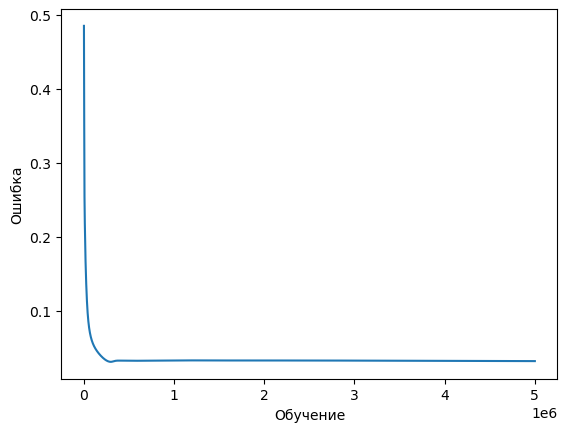

Точность нейронной сети 96.8%


In [8]:

plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

C:\Users\SAMOL\AppData\Local\Temp\ipykernel_2788\9311621.py:30: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


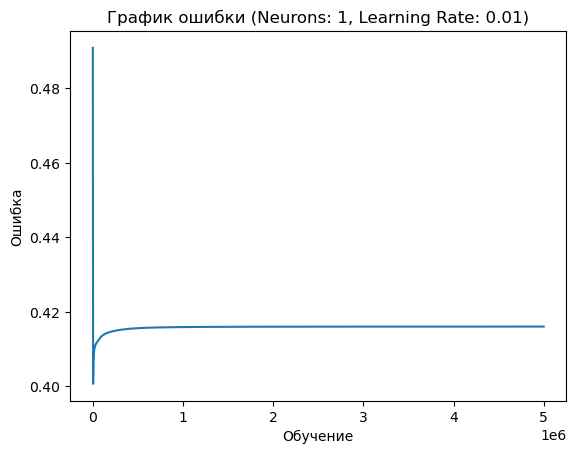

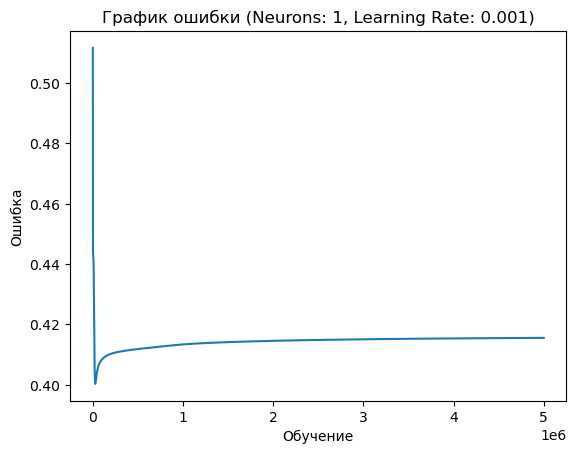

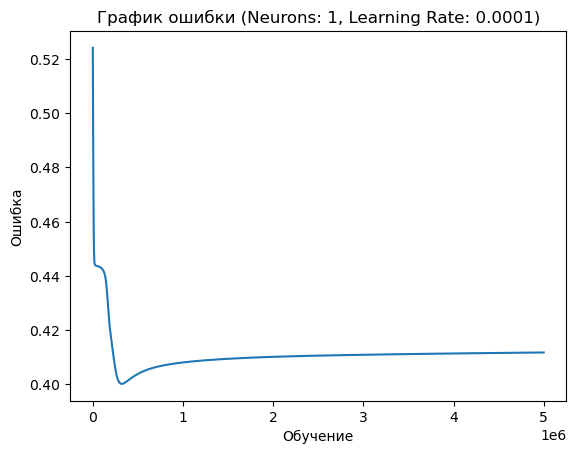

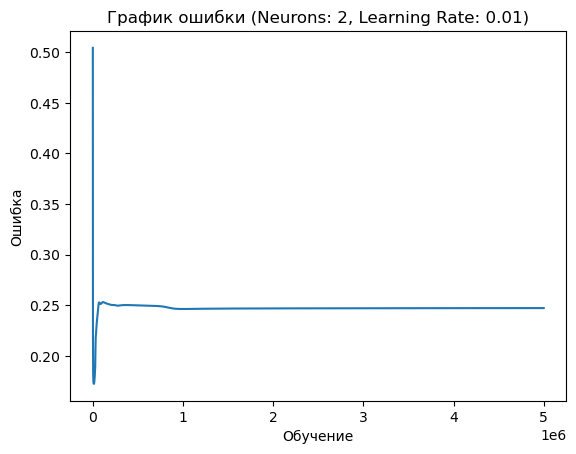

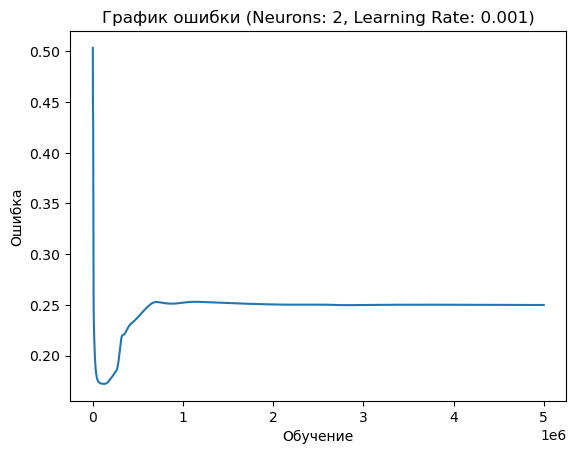

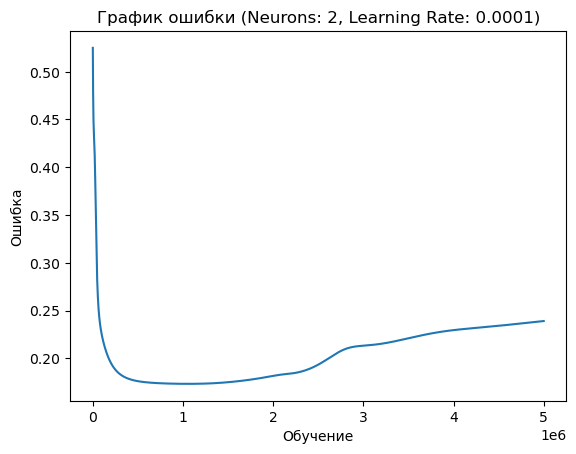

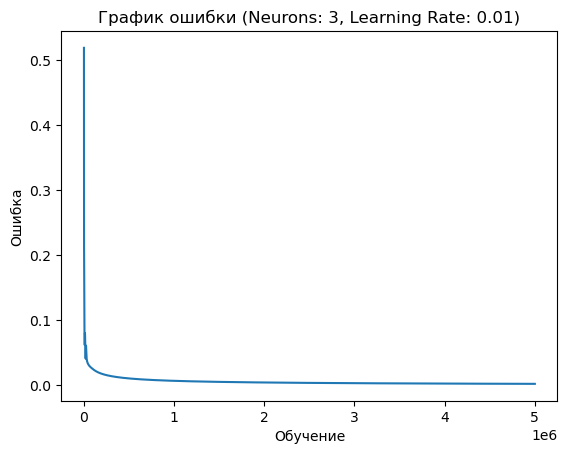

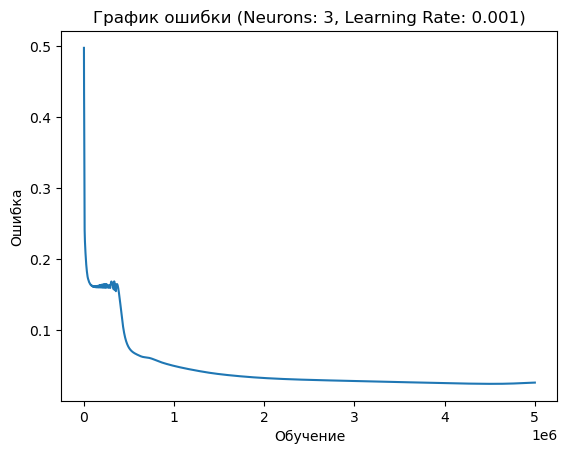

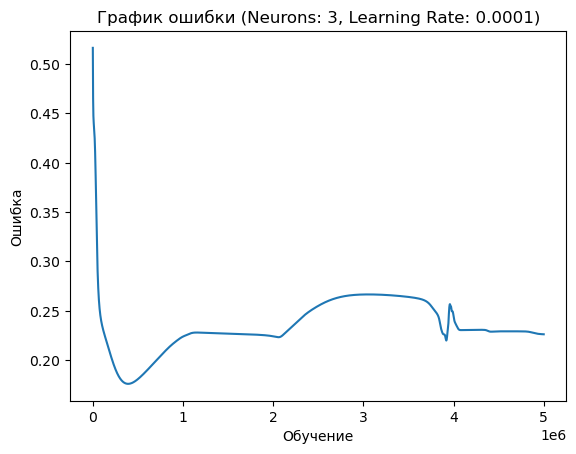

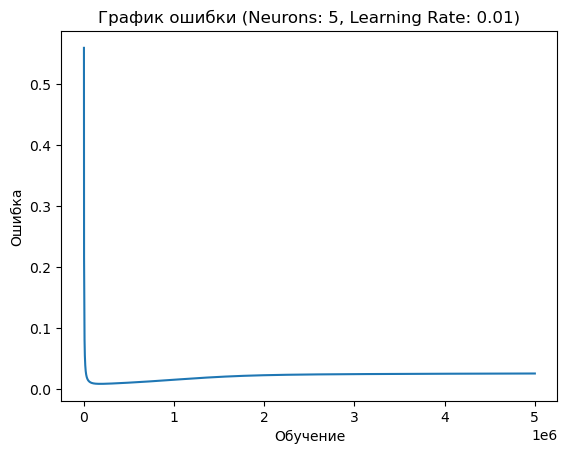

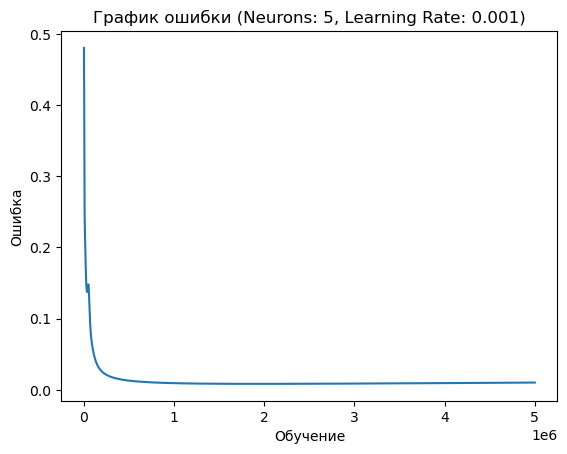

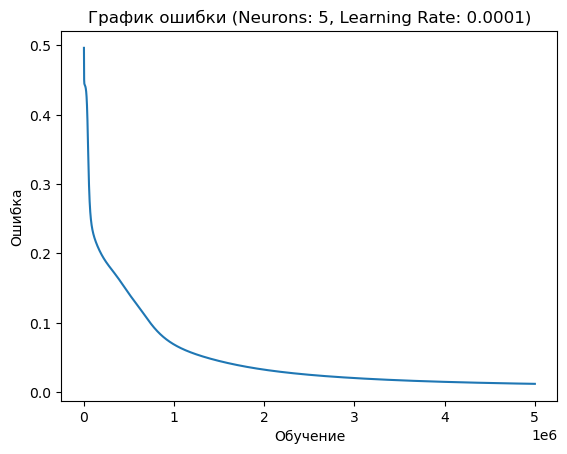

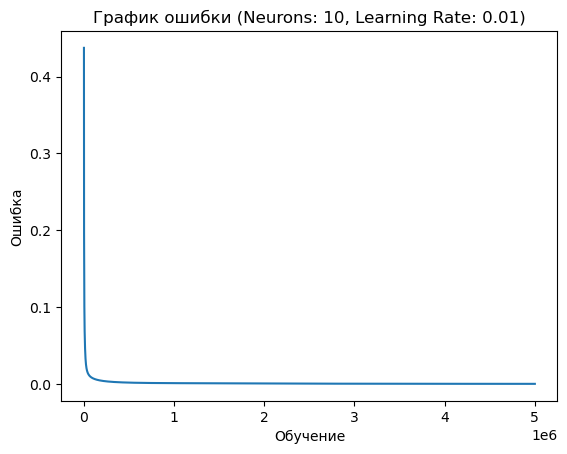

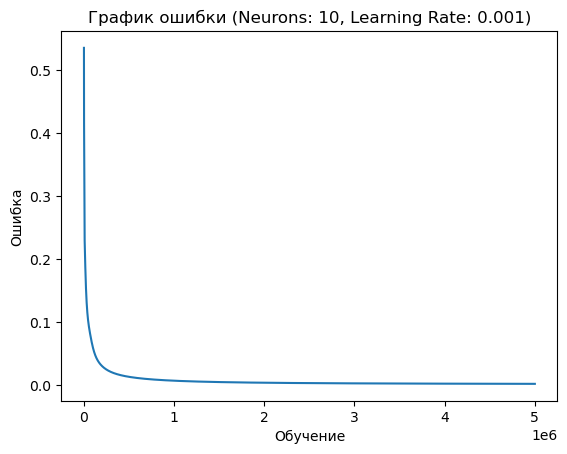

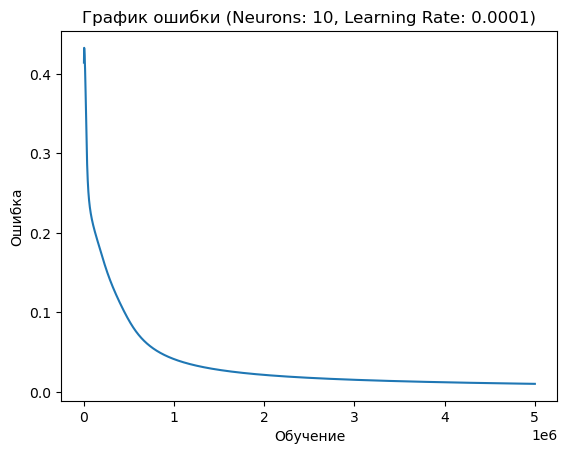

Лучшая точность нейронной сети:
Количество нейронов в скрытых слоях: 10
Скорость обучения: 0.01
Точность нейронной сети: 99.98 %


In [1]:

iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

hidden_neurons = [1, 2, 3, 5, 10]  # список значений количества нейронов в скрытых слоях
learning_rates = [0.01, 0.001, 0.0001]  # список значений скоростей обучения

best_accuracy = 0  # переменная для хранения лучшей точности
best_neurons = 0  # переменная для хранения оптимального количества нейронов
best_learning_rate = 0  # переменная для хранения оптимальной скорости обучения

for neurons in hidden_neurons:
    for rate in learning_rates:
        w0 = 2*np.random.random((4, neurons)) - 1
        w1 = 2*np.random.random((neurons, 3)) - 1

        n = rate

        errors = []

        for i in range(5000000):

            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))
            
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * n
            w0 += layer0.T.dot(layer1_delta) * n

            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            accuracy = (1 - error) * 100

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neurons = neurons
            best_learning_rate = rate

        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.title(f'График ошибки (Neurons: {neurons}, Learning Rate: {rate})')
        plt.show()

print("Лучшая точность нейронной сети:")
print("Количество нейронов в скрытых слоях:", best_neurons)
print("Скорость обучения:", best_learning_rate)
print("Точность нейронной сети:", round(best_accuracy, 2), "%")
